In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import the generic libraries
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import re

In [3]:
# Import NLP-like libraries
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [4]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image  # for word cloud image

In [5]:
# Spacy for processing
from spacy.lang.en.stop_words import STOP_WORDS
import spacy

In [6]:
# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
# XGBoost
import xgboost as xgb

In [8]:
# Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:

# To change date to datetime
from datetime import datetime
import time
import re

# Others
from collections import Counter
import scipy.sparse
import string

# TextBlob
from textblob import TextBlob


In [10]:
# Gensim libraries
!pip install pyLDAvis
import gensim
import gensim.downloader as api
from gensim import corpora, models
from gensim.similarities import MatrixSimilarity
from gensim.models import Word2Vec
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim
from gensim.models import CoherenceModel


In [11]:
# To show all the columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

In [12]:
# To pickle dataframe
import pickle

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

# Basic logging for gensim - optional but important
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# From IPython display
from IPython.display import clear_output
clear_output()

In [13]:
df=pd.read_csv('/content/drive/MyDrive/GrammarandProductReviews.csv')

In [14]:
print("shape :",df.shape)

shape : (71044, 25)


In [15]:
print("Columns :")
print(df.columns)
col_names=df.columns
new_col_names=[i.replace(" ","_") for i in col_names]
df.columns=new_col_names

df.columns
print("Datatypes :\n",df.dtypes)

Columns :
Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')
Datatypes :
 id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64

In [16]:
print("Missing value count:")
print(df.isnull().sum())

Missing value count:
id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             477
reviews.userCity        65634
reviews.userProvince    70595
reviews.username          102
upc                         2
dtype: int64


In [17]:
print(df.isnull().mean().round(4)*100)

id                       0.00
brand                    0.00
categories               0.00
dateAdded                0.00
dateUpdated              0.00
ean                     45.01
keys                     0.00
manufacturer             0.20
manufacturerNumber       0.29
name                     0.00
reviews.date             0.09
reviews.dateAdded        0.00
reviews.dateSeen         0.00
reviews.didPurchase     54.74
reviews.doRecommend     14.94
reviews.id              54.74
reviews.numHelpful      54.24
reviews.rating           0.00
reviews.sourceURLs       0.00
reviews.text             0.05
reviews.title            0.67
reviews.userCity        92.39
reviews.userProvince    99.37
reviews.username         0.14
upc                      0.00
dtype: float64


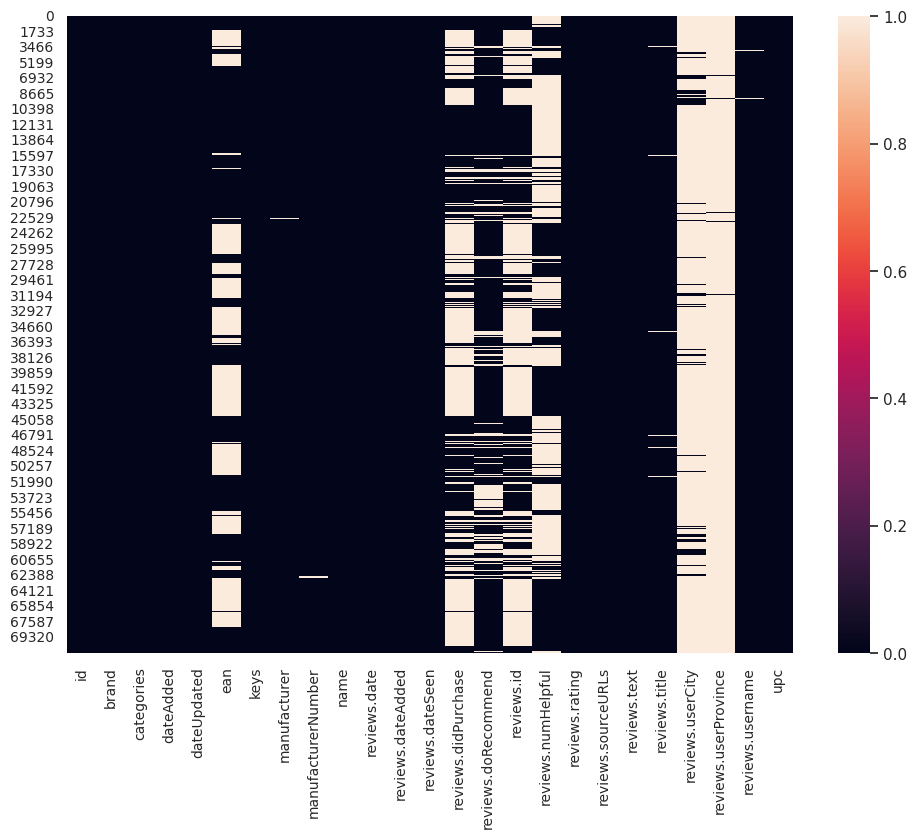

In [18]:
#plot it
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.show()

In [19]:
print("Total Missing Value Count : ",df.isnull().sum().values.sum())

Total Missing Value Count :  296159


In [20]:
missing_val_threshold=len(df)*.2
df.dropna(thresh=missing_val_threshold,axis=1,inplace=True)

In [21]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'upc'],
      dtype='object')

In [22]:
df.shape

(71044, 23)

In [23]:
print("Percentage of missing values :")
print(df.isna().mean().round(4)*100)

Percentage of missing values :
id                      0.00
brand                   0.00
categories              0.00
dateAdded               0.00
dateUpdated             0.00
ean                    45.01
keys                    0.00
manufacturer            0.20
manufacturerNumber      0.29
name                    0.00
reviews.date            0.09
reviews.dateAdded       0.00
reviews.dateSeen        0.00
reviews.didPurchase    54.74
reviews.doRecommend    14.94
reviews.id             54.74
reviews.numHelpful     54.24
reviews.rating          0.00
reviews.sourceURLs      0.00
reviews.text            0.05
reviews.title           0.67
reviews.username        0.14
upc                     0.00
dtype: float64


In [24]:
df['Review']=df['reviews.title'].map(str)+" "+df['reviews.text']

In [26]:
df['Review']=df['Review'].apply(lambda x:str(x).lower())

In [27]:
df['Review']=df['Review'].str.replace('[^\w\s]','')

In [28]:
df['Review'][0]

"just awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

In [29]:
stop=stopwords.words('english')
df['Review']=df['Review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [30]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
      return None

In [31]:
# Lemmatize a sentence
def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = [(word, nltk_tag_to_wordnet_tag(tag)) for word, tag in nltk_tagged]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return ' '.join(lemmatized_sentence)


In [32]:
df['Review']=df['Review'].apply(lambda x:lemmatize_sentence(x))

In [33]:
df['Review'][0]

'awesome love album . good . hip hop side current pop sound .. hype ! listen everyday gym ! give 5star rating way . metaphor crazy .'

In [34]:
df.to_csv("/content/drive/MyDrive/GrammarandProductReviews.csv")

In [35]:
import re

def scrub_words(text):
    # Remove HTML markup
    text = re.sub(r"<.*?>", "", text)

    # Remove non-ASCII and digits
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra whitespace
    text = text.strip()

    return text
df['Review1'] = df['Review'].apply(lambda x: scrub_words(x))